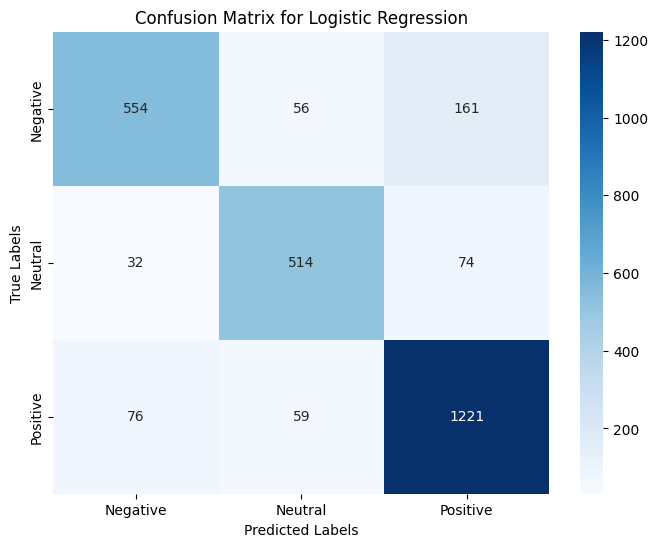

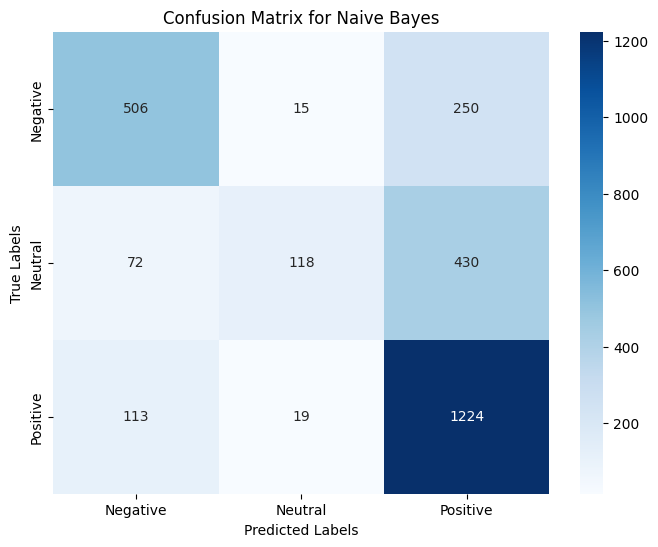

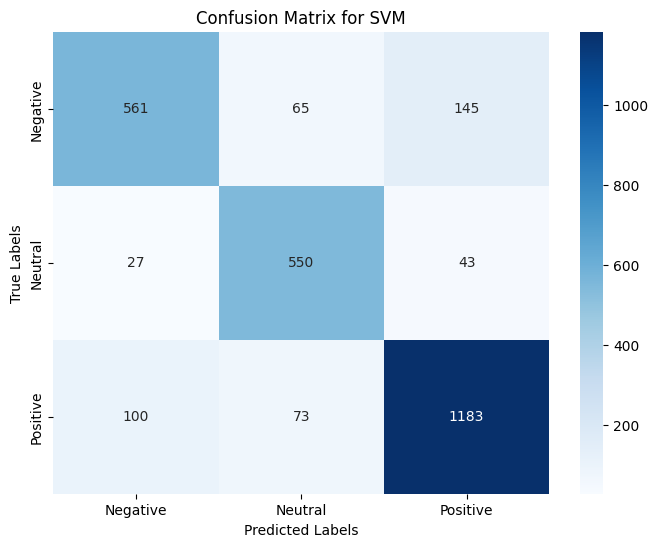


Metrics for Logistic Regression:

Negative Sentiment:
  Precision: 0.84
  Recall: 0.72
  F1-Score: 0.77
  Support: 771

Neutral Sentiment:
  Precision: 0.82
  Recall: 0.83
  F1-Score: 0.82
  Support: 620

Positive Sentiment:
  Precision: 0.84
  Recall: 0.90
  F1-Score: 0.87
  Support: 1356

Metrics for Naive Bayes:

Negative Sentiment:
  Precision: 0.73
  Recall: 0.66
  F1-Score: 0.69
  Support: 771

Neutral Sentiment:
  Precision: 0.78
  Recall: 0.19
  F1-Score: 0.31
  Support: 620

Positive Sentiment:
  Precision: 0.64
  Recall: 0.90
  F1-Score: 0.75
  Support: 1356

Metrics for SVM:

Negative Sentiment:
  Precision: 0.82
  Recall: 0.73
  F1-Score: 0.77
  Support: 771

Neutral Sentiment:
  Precision: 0.80
  Recall: 0.89
  F1-Score: 0.84
  Support: 620

Positive Sentiment:
  Precision: 0.86
  Recall: 0.87
  F1-Score: 0.87
  Support: 1356

Overall Metrics:
                 Model  Accuracy (%)  Precision    Recall  F1-Score  Support
0  Logistic Regression     83.327266   0.830876  0.81

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'tweets1_processed.csv'
tweets_df = pd.read_csv(file_path)

# Encode the target variable
label_encoder = LabelEncoder()
tweets_df['sentiment_encoded'] = label_encoder.fit_transform(tweets_df['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets_df['processed_text'], 
    tweets_df['sentiment_encoded'], 
    test_size=0.2, 
    random_state=42
)

# Convert text data into numerical format using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()
svm = SVC(kernel='linear')

# Train the models
log_reg.fit(X_train_tfidf, y_train)
naive_bayes.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_pred_naive_bayes = naive_bayes.predict(X_test_tfidf)
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate the models
metrics_log_reg = precision_recall_fscore_support(y_test, y_pred_log_reg)
metrics_naive_bayes = precision_recall_fscore_support(y_test, y_pred_naive_bayes)
metrics_svm = precision_recall_fscore_support(y_test, y_pred_svm)

# Confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrices
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix_log_reg, "Logistic Regression")
plot_confusion_matrix(conf_matrix_naive_bayes, "Naive Bayes")
plot_confusion_matrix(conf_matrix_svm, "SVM")

# Class-specific metrics for each model
def class_specific_metrics(y_test, y_pred):
    metrics = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2])
    return {
        "Negative": {
            "Precision": metrics[0][0],
            "Recall": metrics[1][0],
            "F1-Score": metrics[2][0],
            "Support": metrics[3][0]
        },
        "Neutral": {
            "Precision": metrics[0][1],
            "Recall": metrics[1][1],
            "F1-Score": metrics[2][1],
            "Support": metrics[3][1]
        },
        "Positive": {
            "Precision": metrics[0][2],
            "Recall": metrics[1][2],
            "F1-Score": metrics[2][2],
            "Support": metrics[3][2]
        }
    }

log_reg_metrics = class_specific_metrics(y_test, y_pred_log_reg)
naive_bayes_metrics = class_specific_metrics(y_test, y_pred_naive_bayes)
svm_metrics = class_specific_metrics(y_test, y_pred_svm)

# Print the results in a structured format
def print_metrics(model_name, metrics):
    print(f"\nMetrics for {model_name}:")
    for sentiment, scores in metrics.items():
        print(f"\n{sentiment} Sentiment:")
        print(f"  Precision: {scores['Precision']:.2f}")
        print(f"  Recall: {scores['Recall']:.2f}")
        print(f"  F1-Score: {scores['F1-Score']:.2f}")
        print(f"  Support: {scores['Support']}")

print_metrics("Logistic Regression", log_reg_metrics)
print_metrics("Naive Bayes", naive_bayes_metrics)
print_metrics("SVM", svm_metrics)

# Collect overall results
overall_results = {
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Accuracy (%)": [
        accuracy_score(y_test, y_pred_log_reg) * 100,
        accuracy_score(y_test, y_pred_naive_bayes) * 100,
        accuracy_score(y_test, y_pred_svm) * 100
    ],
    "Precision": [
        metrics_log_reg[0].mean(),
        metrics_naive_bayes[0].mean(),
        metrics_svm[0].mean()
    ],
    "Recall": [
        metrics_log_reg[1].mean(),
        metrics_naive_bayes[1].mean(),
        metrics_svm[1].mean()
    ],
    "F1-Score": [
        metrics_log_reg[2].mean(),
        metrics_naive_bayes[2].mean(),
        metrics_svm[2].mean()
    ],
    "Support": [
        metrics_log_reg[3].sum(),
        metrics_naive_bayes[3].sum(),
        metrics_svm[3].sum()
    ]
}

overall_results_df = pd.DataFrame(overall_results)

print("\nOverall Metrics:")
print(overall_results_df)
